# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [102]:
# Initial imports
%matplotlib inline

import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient
import panel as pn
from panel.interact import interact

import warnings
warnings.filterwarnings('ignore')

load_dotenv()

[nltk_data] Downloading package vader_lexicon to C:\Users\Steve Stark
[nltk_data]     REALTOR\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [103]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")


In [104]:
# Create a newsapi client
newsapi = NewsApiClient(api_key="08c37ca4586a48958eee8f70373138e5")

In [105]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="Bitcoin",
    language="en"
)

# Show the total number of news
bitcoin_news_en["totalResults"]

6488

In [106]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="Ethereum",
    language="en"
)

# Show the total number of news
ethereum_news_en["totalResults"]

2952

In [107]:
# Create function to transform articles list into a DataFrame. 

def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [127]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_en_df = create_df(bitcoin_news_en["articles"], "en")
bitcoin_en_df = bitcoin_en_df[['date','title','description','text','language']]
bitcoin_en_df.sort_values('date', ascending=True)
bitcoin_en_df.head()

,date,title,description,text,language
0,2021-08-06T11:00:00Z,A Field Guide for Nature-Resistant Nerds,"Yes, yes, the dirt is horrifying. But it’s als...",When my wife started a little garden in our ur...,en
1,2021-08-23T13:49:45Z,"PayPal expands the ability to buy, hold and se...",PayPal will now allow users outside the U.S. t...,PayPal will now allow users outside the U.S. t...,en
2,2021-08-10T00:34:05Z,"Jack Dorsey says Bitcoin will unite the world,...",Twitter and Square CEO Jack Dorsey claimed on ...,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,en
3,2021-08-19T20:00:00Z,How to Pay For Your Vacation With Crypto,Retailers are increasingly accepting cryptocur...,Retailers are increasingly accepting cryptocur...,en
4,2021-08-23T10:14:07Z,PayPal brings cryptocurrency trading to the UK,"PayPal is bringing the ability to buy, hold an...","PayPal is bringing the ability to buy, hold an...",en


In [109]:
# Create the Ethereum sentiment scores DataFrame
ethereum_en_df = create_df(ethereum_news_en["articles"], "en")
ethereum_en_df = ethereum_en_df[['date','title','description','text','language']]
ethereum_en_df.sort_values('date', ascending=True)
ethereum_en_df.head(5)

,date,title,description,text,language
0,2021-08-05T13:22:07Z,"Cent, the platform that Jack Dorsey used to se...",Cent was founded in 2017 as an ad-free creator...,Cent was founded in 2017 as an ad-free creator...,en
1,2021-08-23T13:49:45Z,"PayPal expands the ability to buy, hold and se...",PayPal will now allow users outside the U.S. t...,PayPal will now allow users outside the U.S. t...,en
2,2021-08-23T10:14:07Z,PayPal brings cryptocurrency trading to the UK,"PayPal is bringing the ability to buy, hold an...","PayPal is bringing the ability to buy, hold an...",en
3,2021-08-10T21:06:43Z,"Coinbase crushes Q2 expectations, notes Q3 tra...","After the bell today, Coinbase reported anothe...","After the bell today, Coinbase reported anothe...",en
4,2021-08-05T12:48:00Z,Ethereum major upgrade activated; ether stays ...,"A major software upgrade on Ethereum, the seco...",Representation of the Ethereum virtual currenc...,en


In [110]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result


Use the the VADER sentiment module from `NLTK` to score the sentiment of every news article title and text in english; you should append ten new columns to the Bitcoin and Ethereum news DataFrames to store the results as follows.

* Title's compound score
* Title's positive score
* Title's neutral score
* Title's negative score
* Title's normalized score (using the `get_sentiment()` function)
* Text's compound score
* Text's positive score
* Text's neutral score
* Text's negative score
* Text's normalized score (using the `get_sentiment()` function)

In [111]:
# Bitcoin sentiment scores dictionaries
bitcoin_title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
bitcoin_text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Ethereum sentiment scores dictionaries
ethereum_title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
ethereum_text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

In [112]:
# Get sentiment for the Bitcoin text and the title
for index, row in bitcoin_en_df.iterrows():
    try:
        # Sentiment scoring with VADER
        bitcoin_title_sentiment = analyzer.polarity_scores(row["title"])
        bitcoin_title_sent["title_compound"].append(bitcoin_title_sentiment["compound"])
        bitcoin_title_sent["title_pos"].append(bitcoin_title_sentiment["pos"])
        bitcoin_title_sent["title_neu"].append(bitcoin_title_sentiment["neu"])
        bitcoin_title_sent["title_neg"].append(bitcoin_title_sentiment["neg"])
        bitcoin_title_sent["title_sent"].append(get_sentiment(bitcoin_title_sentiment["compound"]))

        bitcoin_text_sentiment = analyzer.polarity_scores(row["text"])
        bitcoin_text_sent["text_compound"].append(bitcoin_text_sentiment["compound"])
        bitcoin_text_sent["text_pos"].append(bitcoin_text_sentiment["pos"])
        bitcoin_text_sent["text_neu"].append(bitcoin_text_sentiment["neu"])
        bitcoin_text_sent["text_neg"].append(bitcoin_text_sentiment["neg"])
        bitcoin_text_sent["text_sent"].append(get_sentiment(bitcoin_text_sentiment["compound"]))
    except AttributeError:
        pass

In [113]:
# Attaching sentiment columns to the Bitcoin DataFrame
bitcoin_title_sentiment_df = pd.DataFrame(bitcoin_title_sent)
bitcoin_text_sentiment_df = pd.DataFrame(bitcoin_text_sent)
bitcoin_en_df = bitcoin_en_df.join(bitcoin_title_sentiment_df).join(bitcoin_text_sentiment_df).dropna().sort_index()

bitcoin_en_df.shape

(20, 15)

In [114]:
# Get sentiment for the Ethereum text and the title
for index, row in ethereum_en_df.iterrows():
    try:
        # Sentiment scoring with VADER
        ethereum_title_sentiment = analyzer.polarity_scores(row["title"])
        ethereum_title_sent["title_compound"].append(ethereum_title_sentiment["compound"])
        ethereum_title_sent["title_pos"].append(ethereum_title_sentiment["pos"])
        ethereum_title_sent["title_neu"].append(ethereum_title_sentiment["neu"])
        ethereum_title_sent["title_neg"].append(ethereum_title_sentiment["neg"])
        ethereum_title_sent["title_sent"].append(get_sentiment(ethereum_title_sentiment["compound"]))

        ethereum_text_sentiment = analyzer.polarity_scores(row["text"])
        ethereum_text_sent["text_compound"].append(ethereum_text_sentiment["compound"])
        ethereum_text_sent["text_pos"].append(ethereum_text_sentiment["pos"])
        ethereum_text_sent["text_neu"].append(ethereum_text_sentiment["neu"])
        ethereum_text_sent["text_neg"].append(ethereum_text_sentiment["neg"])
        ethereum_text_sent["text_sent"].append(get_sentiment(ethereum_text_sentiment["compound"]))
    except AttributeError:
        pass

In [115]:
# Attaching sentiment columns to the Ethereum DataFrame
ethereum_title_sentiment_df = pd.DataFrame(ethereum_title_sent)
ethereum_text_sentiment_df = pd.DataFrame(ethereum_text_sent)
ethereum_en_df = ethereum_en_df.join(ethereum_title_sentiment_df).join(ethereum_text_sentiment_df).sort_index()

ethereum_en_df.head(-1)

,date,title,description,text,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2021-08-05T13:22:07Z,"Cent, the platform that Jack Dorsey used to se...",Cent was founded in 2017 as an ad-free creator...,Cent was founded in 2017 as an ad-free creator...,en,0.0000,0.000,1.000,0.000,0,0.6956,0.190,0.810,0.000,1
1,2021-08-23T13:49:45Z,"PayPal expands the ability to buy, hold and se...",PayPal will now allow users outside the U.S. t...,PayPal will now allow users outside the U.S. t...,en,0.4019,0.252,0.748,0.000,1,0.4215,0.098,0.902,0.000,1
2,2021-08-23T10:14:07Z,PayPal brings cryptocurrency trading to the UK,"PayPal is bringing the ability to buy, hold an...","PayPal is bringing the ability to buy, hold an...",en,0.0000,0.000,1.000,0.000,0,0.6908,0.161,0.839,0.000,1
3,2021-08-10T21:06:43Z,"Coinbase crushes Q2 expectations, notes Q3 tra...","After the bell today, Coinbase reported anothe...","After the bell today, Coinbase reported anothe...",en,-0.6249,0.000,0.638,0.362,-1,0.5719,0.139,0.861,0.000,1
4,2021-08-05T12:48:00Z,Ethereum major upgrade activated; ether stays ...,"A major software upgrade on Ethereum, the seco...",Representation of the Ethereum virtual currenc...,en,-0.2960,0.000,0.761,0.239,-1,0.0000,0.000,1.000,0.000,0
5,2021-08-23T16:17:26Z,Poly Network says it has recovered all $610 mi...,One of the most unusual cryptocurrency heists ...,One of the most unusual cryptocurrency heists ...,en,-0.3182,0.000,0.850,0.150,-1,-0.1027,0.000,0.957,0.043,-1
6,2021-08-05T04:53:00Z,Ether near two-month high ahead of major proto...,Ether held near two-month highs on Thursday a...,"HONG KONG, Aug 5 (Reuters) - Ether held near t...",en,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0
7,2021-08-03T05:50:46Z,"Upgrades, ESG, DeFi usage to help ether outpac...",The Ethereum platform's potential applications...,Representations of cryptocurrencies Bitcoin an...,en,0.4019,0.197,0.803,0.000,1,0.0000,0.000,1.000,0.000,0
8,2021-08-18T10:39:49Z,Ethereum co-creator Vitalik Buterin will help ...,Buterin has previously said a collaboration be...,"Vitalik Buterin, founder of ethereum, during T...",en,0.4019,0.153,0.847,0.000,1,0.0000,0.000,1.000,0.000,0
9,2021-08-24T17:38:52Z,Citi will reportedly start trading bitcoin fut...,Citi had previously offered clients access to ...,Justin Sullivan/Getty Images\r\nCitigroup is a...,en,-0.1280,0.000,0.914,0.086,-1,0.3182,0.076,0.924,0.000,1


### Analyzing Sentiments Results

How the sentiment of the title and the text differs on news articles?

To answer this question, on this section you will create a bar chart contrasting the normalized sentiment for the title and the text of each news article. Use the build-in `plot()` method of the Pandas DataFrame to create a bar chart like the one bellow. Be aware that you chart might differ from this one due to is made from a different news DataFrame.

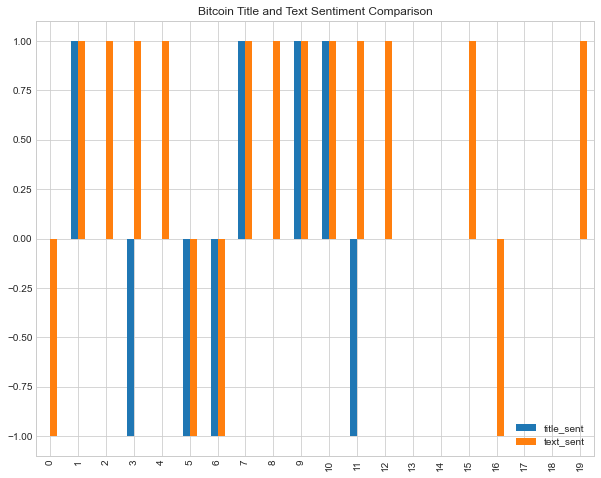

In [116]:
bitcoin_plot = bitcoin_en_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="Bitcoin Title and Text Sentiment Comparison",
    figsize=(10, 8),
    grid=True,
)


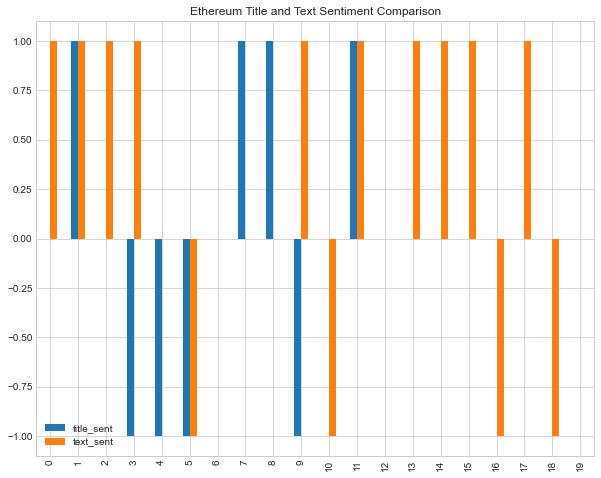

In [117]:
ethereum_plot = ethereum_en_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="Ethereum Title and Text Sentiment Comparison",
    figsize=(10, 8),
    grid=True,
)

In [118]:
# Describe the Bitcoin Sentiment
bitcoin_en_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.017010,0.043200,0.904650,0.052150,0.000000,0.162885,0.071100,0.895400,0.033500,0.400000
std,0.194382,0.080112,0.123871,0.102115,0.648886,0.447308,0.065972,0.071897,0.068998,0.820783
min,-0.624900,0.000000,0.638000,0.000000,-1.000000,-0.886000,0.000000,0.729000,0.000000,-1.000000
25%,0.000000,0.000000,0.831250,0.000000,0.000000,0.000000,0.000000,0.846000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.138950,0.066500,0.904500,0.000000,1.000000
75%,0.006450,0.032500,1.000000,0.029500,0.000000,0.525925,0.108250,0.924750,0.043000,1.000000
max,0.401900,0.252000,1.000000,0.362000,1.000000,0.718400,0.200000,1.000000,0.271000,1.000000


In [119]:
# Describe the Ethereum Sentiment
ethereum_en_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,0.012025,0.042700,0.915450,0.041850,0.000000,0.115780,0.055800,0.91775,0.026400,0.300000
std,0.255359,0.089666,0.117946,0.098149,0.648886,0.388471,0.062553,0.08120,0.072668,0.801315
min,-0.624900,0.000000,0.638000,0.000000,-1.000000,-0.893400,0.000000,0.68800,0.000000,-1.000000
25%,0.000000,0.000000,0.836000,0.000000,0.000000,0.000000,0.000000,0.86325,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.113150,0.049000,0.92800,0.000000,0.500000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.344025,0.095000,1.00000,0.000000,1.000000
max,0.401900,0.252000,1.000000,0.362000,1.000000,0.695600,0.190000,1.00000,0.312000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: For titles, Ethereum had a higher mean positive score. For text, it was Bitcoin.

Q: Which coin had the highest negative score?

A: For both titles and text, Bitcoin had higher negative scores

Q. Which coin had the highest positive score?

A: From the max row of data, Bitcoin & Ethereum tied with the highest positive score of 0.252 for titles. 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [120]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [121]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [122]:
# Create a list of stopwords
sw = set(stopwords.words('english'))

In [123]:
# Expand the default stopwords list if necessary
sw_addon = {'said', 'asked', 'told'}

In [124]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    
    # Create a tokenized list of the words
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase and remove stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [129]:
bitcoin_en_df["tokens"] = bitcoin_en_df.text.apply(tokenizer)
bitcoin_en_df

,date,title,description,text,language,tokens
0,2021-08-06T11:00:00Z,A Field Guide for Nature-Resistant Nerds,"Yes, yes, the dirt is horrifying. But it’s als...",When my wife started a little garden in our ur...,en,"[wife, started, little, garden, urban, backyar..."
1,2021-08-23T13:49:45Z,"PayPal expands the ability to buy, hold and se...",PayPal will now allow users outside the U.S. t...,PayPal will now allow users outside the U.S. t...,en,"[paypal, allow, user, outside, us, buy, hold, ..."
2,2021-08-10T00:34:05Z,"Jack Dorsey says Bitcoin will unite the world,...",Twitter and Square CEO Jack Dorsey claimed on ...,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,en,"[photo, joe, raedlegetty, images, twitter, squ..."
3,2021-08-19T20:00:00Z,How to Pay For Your Vacation With Crypto,Retailers are increasingly accepting cryptocur...,Retailers are increasingly accepting cryptocur...,en,"[retailers, increasingly, accepting, cryptocur..."
4,2021-08-23T10:14:07Z,PayPal brings cryptocurrency trading to the UK,"PayPal is bringing the ability to buy, hold an...","PayPal is bringing the ability to buy, hold an...",en,"[paypal, bringing, ability, buy, hold, sell, c..."
5,2021-08-25T23:21:05Z,The real victims of mass crypto-hacks that kee...,Millions in Bitcoin and other digital coins ar...,By Joe TidyCyber reporter \r\nTaxi driver Chri...,en,"[joe, tidycyber, reporter, taxi, driver, chris..."
6,2021-08-12T23:15:25Z,The fiendish new trick cyber-criminals are usi...,Bitcoin researchers discover a new darknet too...,"By Joe TidyCyber reporter \r\n""Follow the mone...",en,"[joe, tidycyber, reporter, follow, money, gene..."
7,2021-08-23T10:49:35Z,PayPal to allow UK users to buy and sell crypt...,"Payment platform offers service for bitcoin, e...","PayPal is to allow users in the UK to buy, hol...",en,"[paypal, allow, user, uk, buy, hold, sell, cry..."
8,2021-08-18T08:00:00Z,T-Mobile Offers Free Identity Theft Protection...,T-Mobile will offer two years of free identity...,T-Mobile will offer two years of free identity...,en,"[tmobile, offer, two, year, free, identity, th..."
9,2021-08-27T19:04:00Z,Bitcoin fever reaches Honduras with first cryp...,The first cryptocurrency ATM in Honduras opene...,Aug 27 (Reuters) - The first cryptocurrency AT...,en,"[aug, reuters, first, cryptocurrency, atm, hon..."


In [130]:
# Create a new tokens column for Ethereum
ethereum_en_df["tokens"] = ethereum_en_df.text.apply(tokenizer)
ethereum_en_df

,date,title,description,text,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,tokens
0,2021-08-05T13:22:07Z,"Cent, the platform that Jack Dorsey used to se...",Cent was founded in 2017 as an ad-free creator...,Cent was founded in 2017 as an ad-free creator...,en,0.0000,0.000,1.000,0.000,0,0.6956,0.190,0.810,0.000,1,"[cent, wa, founded, adfree, creator, network, ..."
1,2021-08-23T13:49:45Z,"PayPal expands the ability to buy, hold and se...",PayPal will now allow users outside the U.S. t...,PayPal will now allow users outside the U.S. t...,en,0.4019,0.252,0.748,0.000,1,0.4215,0.098,0.902,0.000,1,"[paypal, allow, user, outside, us, buy, hold, ..."
2,2021-08-23T10:14:07Z,PayPal brings cryptocurrency trading to the UK,"PayPal is bringing the ability to buy, hold an...","PayPal is bringing the ability to buy, hold an...",en,0.0000,0.000,1.000,0.000,0,0.6908,0.161,0.839,0.000,1,"[paypal, bringing, ability, buy, hold, sell, c..."
3,2021-08-10T21:06:43Z,"Coinbase crushes Q2 expectations, notes Q3 tra...","After the bell today, Coinbase reported anothe...","After the bell today, Coinbase reported anothe...",en,-0.6249,0.000,0.638,0.362,-1,0.5719,0.139,0.861,0.000,1,"[bell, today, coinbase, reported, another, per..."
4,2021-08-05T12:48:00Z,Ethereum major upgrade activated; ether stays ...,"A major software upgrade on Ethereum, the seco...",Representation of the Ethereum virtual currenc...,en,-0.2960,0.000,0.761,0.239,-1,0.0000,0.000,1.000,0.000,0,"[representation, ethereum, virtual, currency, ..."
5,2021-08-23T16:17:26Z,Poly Network says it has recovered all $610 mi...,One of the most unusual cryptocurrency heists ...,One of the most unusual cryptocurrency heists ...,en,-0.3182,0.000,0.850,0.150,-1,-0.1027,0.000,0.957,0.043,-1,"[one, unusual, cryptocurrency, heist, recent, ..."
6,2021-08-05T04:53:00Z,Ether near two-month high ahead of major proto...,Ether held near two-month highs on Thursday a...,"HONG KONG, Aug 5 (Reuters) - Ether held near t...",en,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0,"[hong, kong, aug, reuters, ether, held, near, ..."
7,2021-08-03T05:50:46Z,"Upgrades, ESG, DeFi usage to help ether outpac...",The Ethereum platform's potential applications...,Representations of cryptocurrencies Bitcoin an...,en,0.4019,0.197,0.803,0.000,1,0.0000,0.000,1.000,0.000,0,"[representations, cryptocurrencies, bitcoin, e..."
8,2021-08-18T10:39:49Z,Ethereum co-creator Vitalik Buterin will help ...,Buterin has previously said a collaboration be...,"Vitalik Buterin, founder of ethereum, during T...",en,0.4019,0.153,0.847,0.000,1,0.0000,0.000,1.000,0.000,0,"[vitalik, buterin, founder, ethereum, techcrun..."
9,2021-08-24T17:38:52Z,Citi will reportedly start trading bitcoin fut...,Citi had previously offered clients access to ...,Justin Sullivan/Getty Images\r\nCitigroup is a...,en,-0.1280,0.000,0.914,0.086,-1,0.3182,0.076,0.924,0.000,1,"[justin, sullivangetty, imagescitigroup, activ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [131]:
from collections import Counter
from nltk import ngrams

In [132]:
# Get word counts for Bitcoin article
btc_processed = tokenizer(bitcoin_article)
print(btc_processed)

['retailers', 'increasingly', 'accepting', 'cryptocurrency', 'physical', 'item', 'knowyou', 'spend', 'crypto', 'ephemeral', 'experience', 'like', 'travel', 'cryptocurrency', 'holder', 'indicate', 'willi', 'char']


In [133]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = Counter(ngrams(btc_processed, n=2))
print(dict(btc_bigram_counts))

{('retailers', 'increasingly'): 1, ('increasingly', 'accepting'): 1, ('accepting', 'cryptocurrency'): 1, ('cryptocurrency', 'physical'): 1, ('physical', 'item'): 1, ('item', 'knowyou'): 1, ('knowyou', 'spend'): 1, ('spend', 'crypto'): 1, ('crypto', 'ephemeral'): 1, ('ephemeral', 'experience'): 1, ('experience', 'like'): 1, ('like', 'travel'): 1, ('travel', 'cryptocurrency'): 1, ('cryptocurrency', 'holder'): 1, ('holder', 'indicate'): 1, ('indicate', 'willi'): 1, ('willi', 'char'): 1}


In [134]:
# Get word counts for Ethereum article
eth_processed = tokenizer(ethereum_article)
print(eth_processed)

['cent', 'wa', 'founded', 'adfree', 'creator', 'network', 'allows', 'user', 'offer', 'crypto', 'reward', 'good', 'post', 'comment', 'like', 'gifting', 'award', 'reddit', 'ethereum', 'char']


In [135]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = Counter(ngrams(eth_processed, n=2))
print(dict(eth_bigram_counts))

{('cent', 'wa'): 1, ('wa', 'founded'): 1, ('founded', 'adfree'): 1, ('adfree', 'creator'): 1, ('creator', 'network'): 1, ('network', 'allows'): 1, ('allows', 'user'): 1, ('user', 'offer'): 1, ('offer', 'crypto'): 1, ('crypto', 'reward'): 1, ('reward', 'good'): 1, ('good', 'post'): 1, ('post', 'comment'): 1, ('comment', 'like'): 1, ('like', 'gifting'): 1, ('gifting', 'award'): 1, ('award', 'reddit'): 1, ('reddit', 'ethereum'): 1, ('ethereum', 'char'): 1}


In [136]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [137]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_processed)

[('cryptocurrency', 2),
 ('retailers', 1),
 ('increasingly', 1),
 ('accepting', 1),
 ('physical', 1),
 ('item', 1),
 ('knowyou', 1),
 ('spend', 1),
 ('crypto', 1),
 ('ephemeral', 1)]

In [138]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_processed)

[('cent', 1),
 ('wa', 1),
 ('founded', 1),
 ('adfree', 1),
 ('creator', 1),
 ('network', 1),
 ('allows', 1),
 ('user', 1),
 ('offer', 1),
 ('crypto', 1)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [139]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

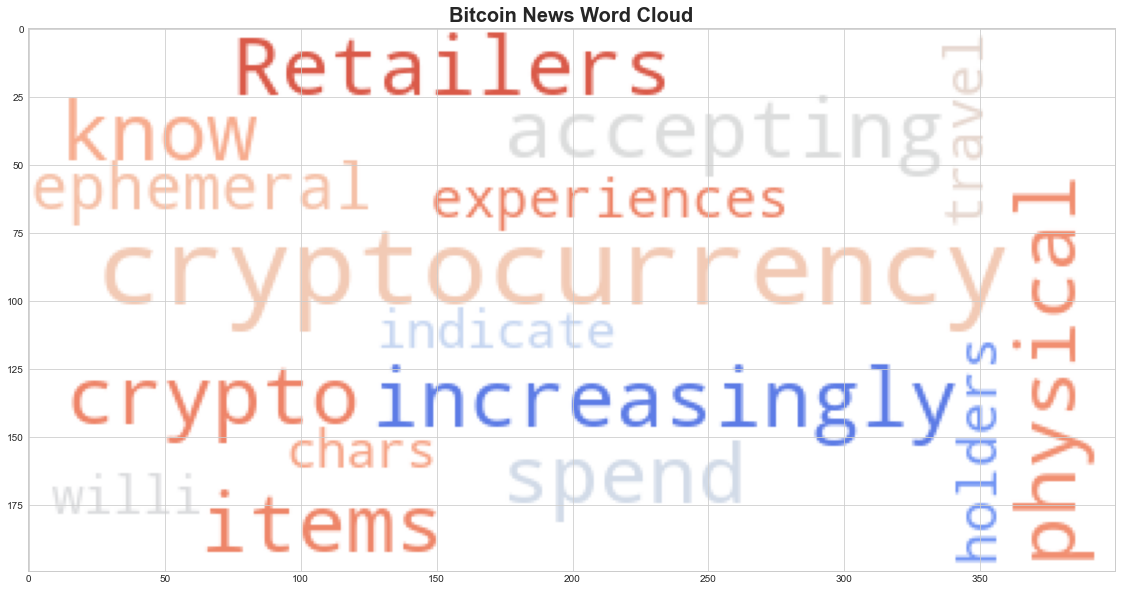

In [140]:
# Generate the Bitcoin word cloud
wc = WordCloud(background_color='white',colormap='coolwarm').generate(bitcoin_article)
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Bitcoin News Word Cloud", fontdict=fontdict)
plt.imshow(wc)

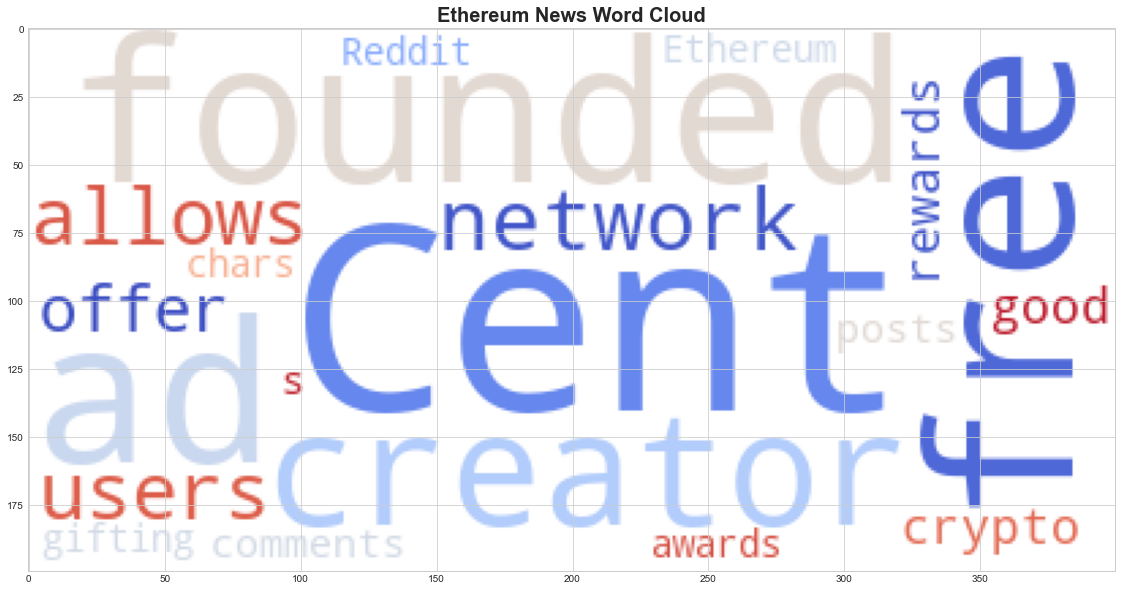

In [141]:
# Generate the Ethereum word cloud
wc = WordCloud(background_color='white',colormap='coolwarm').generate(ethereum_article)
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Ethereum News Word Cloud", fontdict=fontdict)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [142]:
import spacy
from spacy import displacy

In [143]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [144]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [145]:
# Concatenate all of the Bitcoin text together
btc_articles = bitcoin_en_df.text

# Set articles to be analyzed with spaCy
btc_doc = nlp(str(btc_articles))

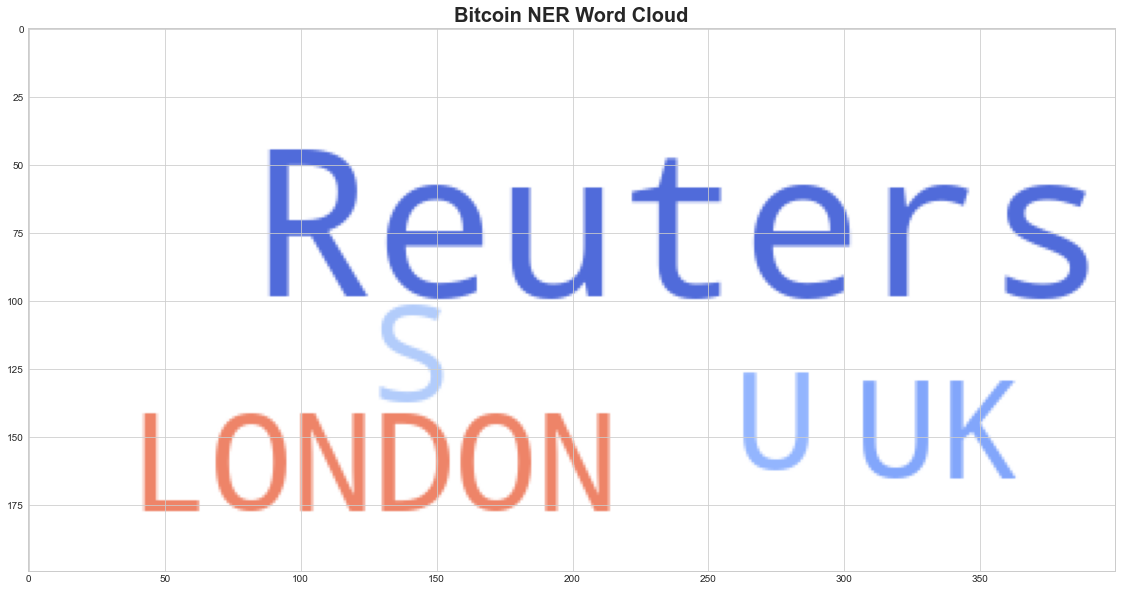

In [146]:
# Run the NER processor on all of the text
btc_entities = [ent.text for ent in btc_doc.ents if ent.label_ in ['GPE', 'ORG']]
wc = WordCloud(background_color='white',colormap='coolwarm').generate(' '.join(btc_entities))

# Add a title to the document
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Bitcoin NER Word Cloud", fontdict=fontdict)

# Render the visualization
plt.imshow(wc)

In [147]:
# List all Entities
list(btc_entities)

['U.S.', 'UK', 'Reuters', 'Reuters', 'LONDON', 'Reuters']

---

### Ethereum NER

In [148]:
# Concatenate all of the Bitcoin text together
eth_articles = ethereum_en_df.text

# Set articles to be analyzed with spaCy
eth_doc = nlp(str(eth_articles))

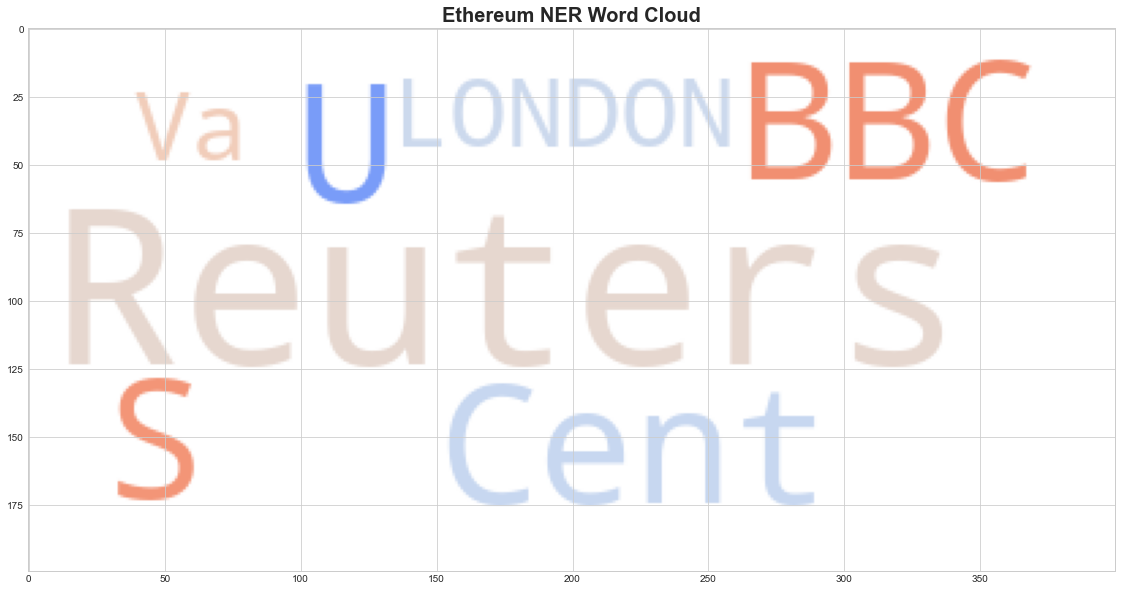

In [149]:
# Run the NER processor on all of the text
eth_entities = [ent.text for ent in eth_doc.ents if ent.label_ in ['GPE', 'ORG']]
wc = WordCloud(background_color='white',colormap='coolwarm').generate(' '.join(eth_entities))

# Add a title to the document
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Ethereum NER Word Cloud", fontdict=fontdict)

# Render the visualization
plt.imshow(wc)

In [150]:
# List all Entities
list(eth_entities)

['0     Cent', 'U.S.', 'Reuters', 'BBC', 'LONDON', 'Reuters', 'Va']

---